In [1]:
import numpy as np
import pandas as pd

% matplotlib inline
import matplotlib.pyplot as plt

In [2]:
Smarket = pd.read_csv("./DataSets/Smarket.csv")

In [3]:
Smarket.columns.values

array(['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today',
       'Direction'], dtype=object)

In [4]:
Smarket.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000
mean,2003.016000,0.003834,0.003919,0.001716,0.001636,0.00561,1.478305,0.003138
std,1.409018,1.136299,1.136280,1.138703,1.138774,1.14755,0.360357,1.136334
min,2001.000000,-4.922000,-4.922000,-4.922000,-4.922000,-4.92200,0.356070,-4.922000
25%,2002.000000,-0.639500,-0.639500,-0.640000,-0.640000,-0.64000,1.257400,-0.639500
50%,2003.000000,0.039000,0.039000,0.038500,0.038500,0.03850,1.422950,0.038500
75%,2004.000000,0.596750,0.596750,0.596750,0.596750,0.59700,1.641675,0.596750
max,2005.000000,5.733000,5.733000,5.733000,5.733000,5.73300,3.152470,5.733000


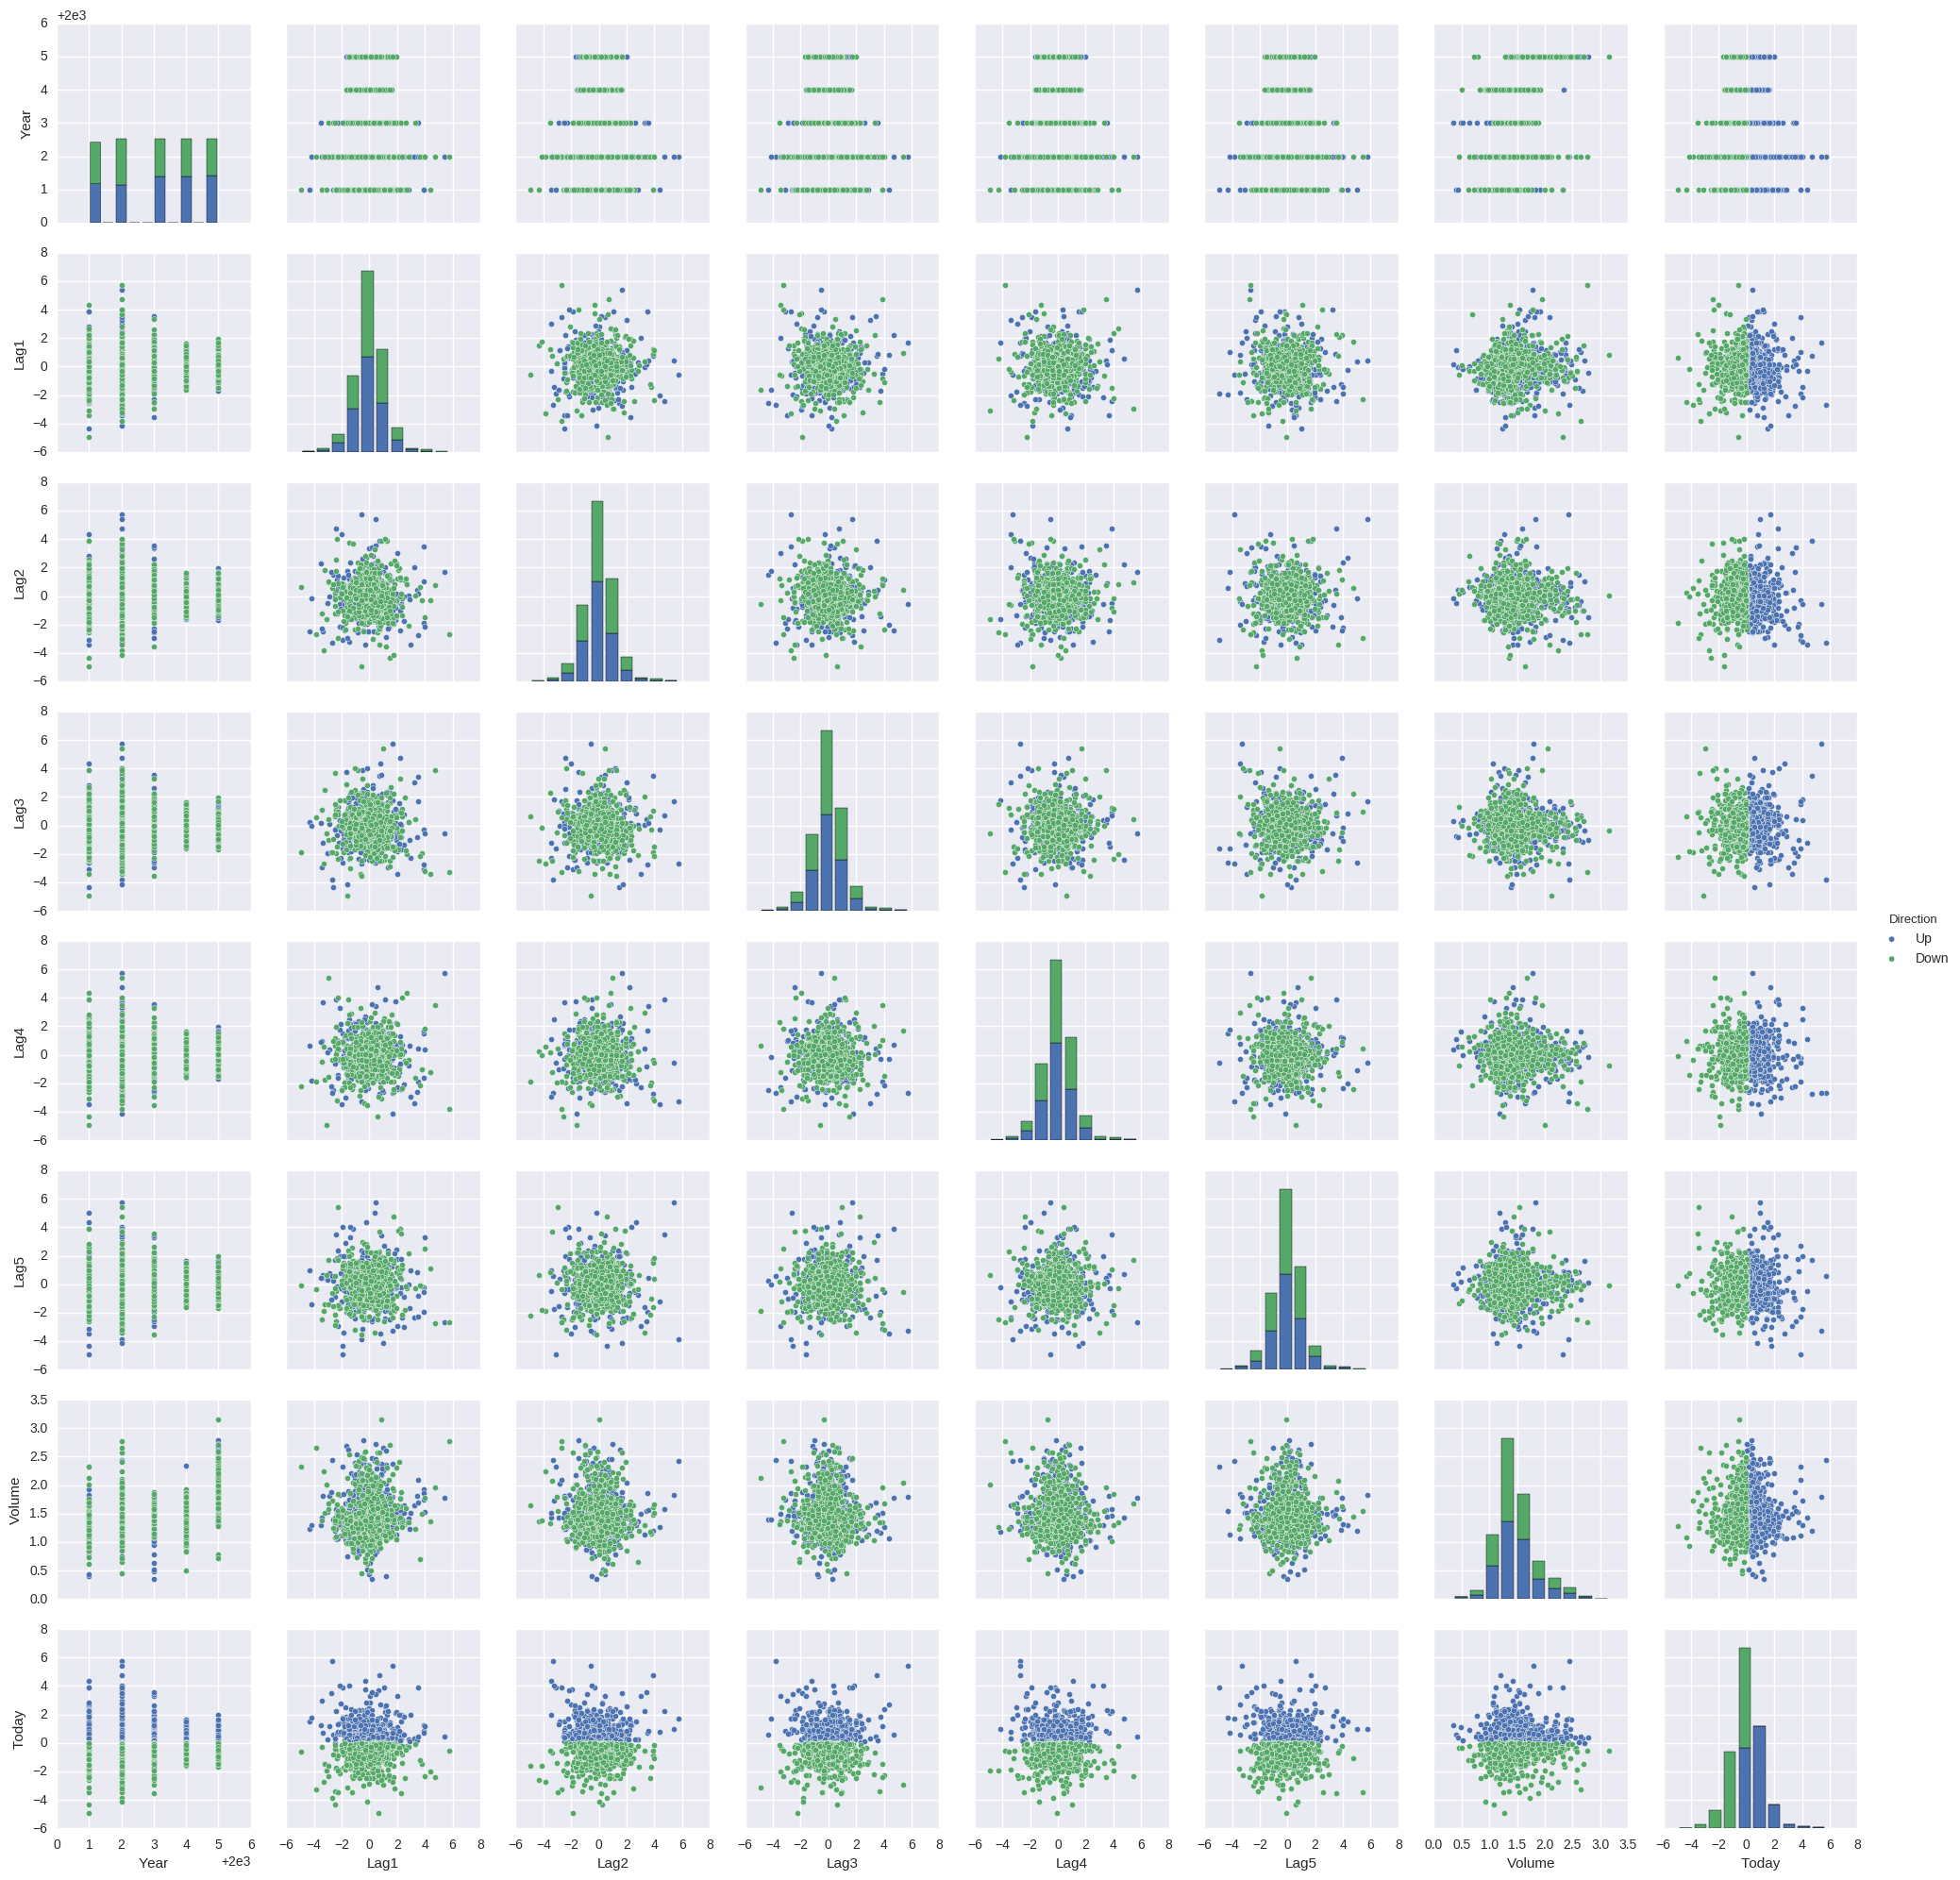

In [5]:
import seaborn as sns
sns.set()

sns.pairplot(Smarket, hue="Direction");

Logistic regression

In [6]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [7]:
glm_fit = smf.glm('Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume', data=Smarket, family=sm.families.Binomial()).fit()

In [8]:
glm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Generalized Linear Model Regression Results                           
================================================================================================
Dep. Variable:     ['Direction[Down]', 'Direction[Up]']   No. Observations:                 1250
Model:                                              GLM   Df Residuals:                     1243
Model Family:                                  Binomial   Df Model:                            6
Link Function:                                    logit   Scale:                             1.0
Method:                                            IRLS   Log-Likelihood:                -863.79
Date:                                  Thu, 22 Dec 2016   Deviance:                       1727.6
Time:                                          12:56:28   Pearson chi2:                 1.25e+03
No. Iterations:                                       6                                         
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.1260      0.241      0.523      0.601        -0.346     0.598
Lag1           0.0731      0.050      1.457      0.145        -0.025     0.171
Lag2           0.0423      0.050      0.845      0.398        -0.056     0.140
Lag3          -0.0111      0.050     -0.222      0.824        -0.109     0.087
Lag4          -0.0094      0.050     -0.187      0.851        -0.107     0.089
Lag5          -0.0103      0.050     -0.208      0.835        -0.107     0.087
Volume        -0.1354      0.158     -0.855      0.392        -0.446     0.175
==============================================================================
"""

In [9]:
glm_probs = glm_fit.fittedvalues

In [10]:
glm_probs[0:5]

0    0.492916
1    0.518532
2    0.518861
3    0.484778
4    0.489219
dtype: float64

In [11]:
glm_pred = ['Up' if p < 0.5 else 'Down' for p in glm_probs]

In [12]:
pd.crosstab(pd.Series(glm_pred, name = 'glm_pred'), Smarket.Direction)

Direction,Down,Up
glm_pred,,
Down,145,141
Up,457,507


In [13]:
np.mean(glm_pred == Smarket.Direction)

0.52159999999999995

Make training and test set

In [14]:
train = Smarket.Year < 2005

In [15]:
glm_fit=smf.glm('Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume',
            data=Smarket,family=sm.families.Binomial(), subset=train).fit()

In [16]:
glm_probs = glm_fit.predict(Smarket[~train])

In [17]:
glm_pred = ['Up' if p < 0.5 else 'Down' for p in glm_probs]

In [18]:
Direction_2005 = Smarket.Direction[~train]

In [19]:
pd.crosstab(pd.Series(glm_pred, name = 'glm_pred'), Direction_2005.reset_index(drop = True))

Direction,Down,Up
glm_pred,,
Down,77,97
Up,34,44


In [20]:
np.mean(glm_pred == Direction_2005)

0.48015873015873017

Fit smaller model

In [21]:
glm_fit = smf.glm('Direction~Lag1+Lag2',data=Smarket,
                  family=sm.families.Binomial(), subset = train).fit()

In [22]:
glm_probs = glm_fit.predict(Smarket[~train])

In [23]:
glm_pred = ['Up' if p < 0.5 else 'Down' for p in glm_probs]

In [24]:
pd.crosstab(pd.Series(glm_pred, name = 'glm_pred'), Direction_2005.reset_index(drop = True))

Direction,Down,Up
glm_pred,,
Down,35,35
Up,76,106


In [25]:
np.mean(glm_pred == Direction_2005)

0.55952380952380953

Linear discriminant analysis

In [26]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = Smarket[['Lag1', 'Lag2']][Smarket.Year<2005]
y = Smarket.Direction[Smarket.Year<2005]

In [27]:
lda_fit = LinearDiscriminantAnalysis().fit(X,y)

In [28]:
lda_fit.priors_

array([ 0.49198397,  0.50801603])

In [29]:
lda_fit.means_

array([[ 0.04279022,  0.03389409],
       [-0.03954635, -0.03132544]])

In [30]:
lda_fit.scalings_

array([[-0.64201904],
       [-0.51352928]])

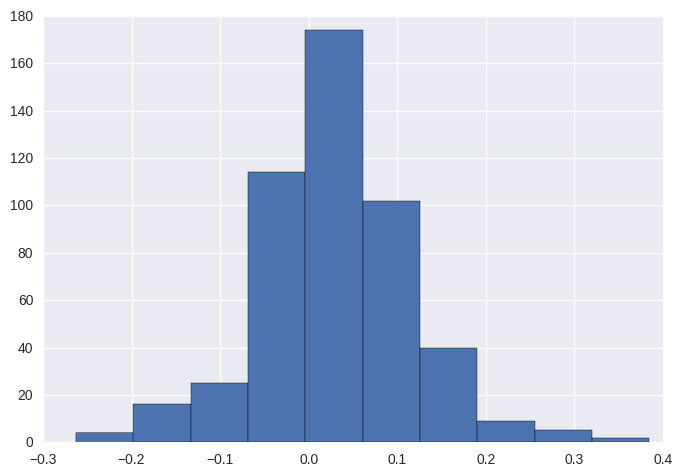

In [31]:
plt.hist(lda_fit.decision_function(X[y == "Down"]));

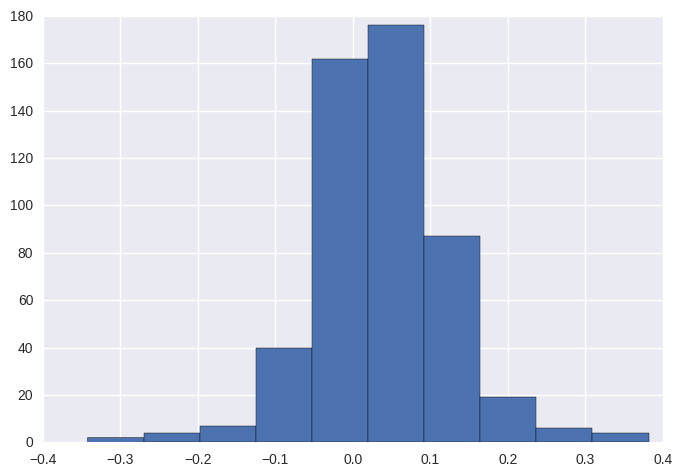

In [32]:
plt.hist(lda_fit.decision_function(X[y == "Up"]));

In [33]:
Smarket_2005 = Smarket[Smarket.Year==2005]

In [34]:
lda_pred = lda_fit.predict(Smarket_2005[['Lag1', 'Lag2']])

In [35]:
pd.crosstab(pd.Series(lda_pred, name = 'lda_pred'), Smarket_2005.Direction.reset_index(drop = True))

Direction,Down,Up
lda_pred,,
Down,35,35
Up,76,106


In [36]:
np.mean(lda_pred == Smarket_2005.Direction)

0.55952380952380953

K-Nearest Neighbors

In [37]:
from sklearn.neighbors import KNeighborsClassifier

Xlag = Smarket[['Lag1','Lag2']]
train = Smarket.Year < 2005

In [38]:
knn_fit = KNeighborsClassifier(n_neighbors = 1).fit(Xlag[train], Smarket.Direction[train])

In [39]:
knn_pred = knn_fit.predict(Xlag[~train])

In [40]:
pd.crosstab(pd.Series(knn_pred, name = 'knn_pred'), Smarket.Direction[~train].reset_index(drop = True))

Direction,Down,Up
knn_pred,,
Down,43,58
Up,68,83


In [41]:
np.mean(knn_pred == Smarket.Direction[~train])

0.5